<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 140.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 128.9 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [8]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [25]:
df.Industry.value_counts()

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

In [3]:
df.Industry.value_counts().index

Index(['Software Development', 'Other:', 'Fintech',
       'Internet, Telecomm or Information Services',
       'Banking/Financial Services', 'Healthcare', 'Manufacturing',
       'Retail and Consumer Services', 'Government',
       'Media & Advertising Services', 'Higher Education',
       'Transportation, or Supply Chain',
       'Computer Systems Design and Services', 'Energy', 'Insurance'],
      dtype='object', name='Industry')

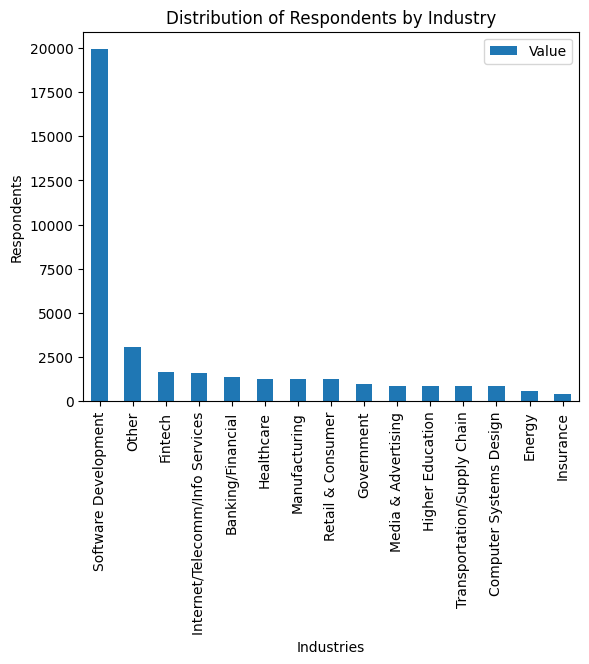

In [6]:
import matplotlib.pyplot as plt

data = {'Industry': ['Software Development', 'Other', 'Fintech',
       'Internet/Telecomm/Info Services',
       'Banking/Financial', 'Healthcare', 'Manufacturing',
       'Retail & Consumer', 'Government',
       'Media & Advertising', 'Higher Education',
       'Transportation/Supply Chain',
       'Computer Systems Design', 'Energy', 'Insurance'],
        'Value': [19918, 3077, 1641, 1629, 1371, 1277, 1265, 1264, 962, 894, 890, 859, 844, 578, 389]}
df = pd.DataFrame(data)
df.plot(x='Industry', y='Value', kind='bar')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industries')
plt.ylabel('Respondents')
plt.show()

In [8]:
df.ResponseId.shape

(65437,)

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [20]:
mean_value = df['ConvertedCompYearly'].mean()
print(mean_value)

mode_value= df['ConvertedCompYearly'].mode()
print(mode_value)

std_dev = df['ConvertedCompYearly'].std() 
print(std_dev)

86155.28726264134
0    64444.0
Name: ConvertedCompYearly, dtype: float64
186756.97308629757


In [21]:
df.ConvertedCompYearly.describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [22]:
mean = 86155.28726264134
std_dev = 186756.97308629757

three_std_above_mean = mean + (3 * std_dev)

print(three_std_above_mean)

646426.2065215341


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [35]:
def calculate_iqr(df, ConvertedCompYearly):

  Q1 = df[ConvertedCompYearly].quantile(0.25)
  Q3 = df[ConvertedCompYearly].quantile(0.75)
  IQR = Q3 - Q1
  return IQR

iqr_value = calculate_iqr(df, 'ConvertedCompYearly')
print(f"The IQR of column 'ConvertedCompYearly' is: {iqr_value}")


def calculate_outlier_bounds(ConvertedCompYearly):
    
    Q1 = ConvertedCompYearly.quantile(0.25)
    Q3 = ConvertedCompYearly.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = calculate_outlier_bounds(df['ConvertedCompYearly'])
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print("Outliers:")
print(outliers)


The IQR of column 'ConvertedCompYearly' is: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Outliers:
       ResponseId                      MainBranch              Age  \
428           429  I am a developer by profession  25-34 years old   
456           457  I am a developer by profession  45-54 years old   
461           462  I am a developer by profession  45-54 years old   
529           530  I am a developer by profession  25-34 years old   
545           546  I am a developer by profession  35-44 years old   
...           ...                             ...              ...   
40952       40953  I am a developer by profession  35-44 years old   
41000       41001  I am a developer by profession  35-44 years old   
41001       41002  I am a developer by profession  45-54 years old   
41027       41028  I am a developer by profession  55-64 years old   
41187       41188  I am a developer by profession  55-64 years old   

                                              Emplo

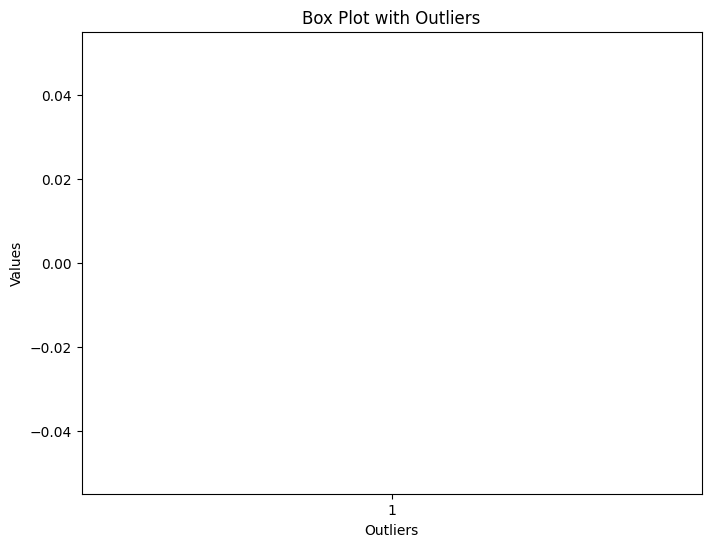

In [38]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of column_name')
plt.xlabel('column_name values')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [ ]:
##Write your code here

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
